# Flight Delays 2008 Exploratory Data Analysis
## by (mohamed mohsen)

## Preliminary Wrangling

> US Flight data for 2008. A lot of great insights can be get from it. Like which months we have many or few flights, why there is delays in flights arrival and departure .





In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline


In [2]:
# load in the dataset into a pandas dataframe, print statistics
#df_2008 = pd.read_csv('2008.csv')
#df_2008.shape

In [38]:
#Due to size of data set, we will initially use a sample of the data sets to find issues with the data.
#df_2008.sample(10000).to_csv('sampled_10000.csv')
df = pd.read_csv('sampled_10000.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,Apr,16,Wednesday,19:05:00,2008-04-16 19:15:00,20:40:00,20:47:00,XE,2600,...,18.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-16
1,2008,Jan,11,Friday,09:10:00,2008-01-11 09:09:00,11:46:00,11:30:00,FL,690,...,15.0,0.0,NaN,0.0,1.0,0.0,15.0,0.0,0.0,2008-01-11
2,2008,Apr,15,Tuesday,06:00:00,2008-04-15 06:00:00,07:41:00,07:45:00,DL,690,...,15.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-15
3,2008,Apr,13,Sunday,05:53:00,2008-04-13 06:00:00,08:31:00,08:37:00,NW,740,...,14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-13
4,2008,Feb,1,Friday,09:31:00,2008-02-01 09:30:00,16:30:00,16:37:00,US,310,...,22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2008,Feb,26,Tuesday,NaN,2008-02-26 18:40:00,NaN,00:05:00,WN,1152,...,NaN,1.0,carrier,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-26
9996,2008,Feb,18,Monday,18:57:00,2008-02-18 18:55:00,19:46:00,19:55:00,WN,1460,...,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-18
9997,2008,Mar,24,Monday,06:39:00,2008-03-24 06:45:00,08:29:00,08:35:00,FL,989,...,17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-03-24
9998,2008,Apr,24,Thursday,06:27:00,2008-04-24 06:25:00,08:19:00,08:25:00,WN,453,...,7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-24


In [5]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(10000, 30)
Year                   int64
Month                 object
DayofMonth             int64
DayOfWeek             object
DepTime               object
CRSDepTime            object
ArrTime               object
CRSArrTime            object
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled            float64
CancellationCode      object
Diverted             float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                  object
dtype: object
   Year Month  DayofMonth  DayOfWeek   DepTime           CRSDepTime   ArrTime  \
0  2008   Apr          

In [4]:
# Date and Time Extraction
df['Date'] = pd.to_datetime(df.Year.map(str)+'-'+df.Month.map(str)+'-'+df.DayofMonth.map(str))


df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,4,16,3,1905.0,1915,2040.0,2047,XE,2600,...,18.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-16
1,2008,1,11,5,910.0,909,1146.0,1130,FL,690,...,15.0,0.0,NaN,0.0,1.0,0.0,15.0,0.0,0.0,2008-01-11
2,2008,4,15,2,600.0,600,741.0,745,DL,690,...,15.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-15
3,2008,4,13,7,553.0,600,831.0,837,NW,740,...,14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-13
4,2008,2,1,5,931.0,930,1630.0,1637,US,310,...,22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2008,2,26,2,NaN,1840,NaN,5,WN,1152,...,NaN,1.0,A,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-26
9996,2008,2,18,1,1857.0,1855,1946.0,1955,WN,1460,...,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-18
9997,2008,3,24,1,639.0,645,829.0,835,FL,989,...,17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-03-24
9998,2008,4,24,4,627.0,625,819.0,825,WN,453,...,7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-24


In [5]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(data, col):    
    liste = []
    for index, cols in data[['Date', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [6]:
df['ArrTime'] = df['ArrTime'].apply(format_heure)
df['CRSDepTime'] = create_flight_time(df, 'CRSDepTime')
df['DepTime'] = df['DepTime'].apply(format_heure)
df['CRSArrTime'] = df['CRSArrTime'].apply(format_heure)



In [7]:
df.loc[:5, ['CRSDepTime', 'CRSArrTime', 'DepTime',
             'ArrTime', 'DepDelay', 'ArrDelay']]


,CRSDepTime,CRSArrTime,DepTime,ArrTime,DepDelay,ArrDelay
0,2008-04-16 19:15:00,20:47:00,19:05:00,20:40:00,-10.0,-7.0
1,2008-01-11 09:09:00,11:30:00,09:10:00,11:46:00,1.0,16.0
2,2008-04-15 06:00:00,07:45:00,06:00:00,07:41:00,0.0,-4.0
3,2008-04-13 06:00:00,08:37:00,05:53:00,08:31:00,-7.0,-6.0
4,2008-02-01 09:30:00,16:37:00,09:31:00,16:30:00,1.0,-7.0
5,2008-02-08 18:50:00,21:30:00,19:00:00,21:23:00,10.0,-7.0


In [25]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=85d3db95dbbf38ee6885aad4053bdcbea2540e35c3d028f622d987554979e9ff
  Stored in directory: c:\users\mohamed\appdata\local\pip\cache\wheels\9a\0d\2e\309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3443 sha256=ce7e564e0189a8f405b9eafd9b06f9bb5515592fb2497e439a928eec7d4956e6
  Stored in directory: c:\users\mohamed\appdata\local\pip\cache\wheels\f8\84\15\465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek


In [36]:
# convert Month and Day Of Week numbers to actual months and days  
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(dayOfWeek)
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
# convert Cancellation Code 'A': 'carrier', 'B': 'weather', 'C': 'NAS', 'D': 'security'
df['CancellationCode'].replace({'A': 'carrier', 'B': 'weather', 'C': 'NAS', 'D': 'security'}, inplace = True)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,Jan,16,NaN,19:05:00,2008-04-16 19:15:00,20:40:00,20:47:00,XE,2600,...,18.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-16
1,2008,Jan,11,NaN,09:10:00,2008-01-11 09:09:00,11:46:00,11:30:00,FL,690,...,15.0,0.0,NaN,0.0,1.0,0.0,15.0,0.0,0.0,2008-01-11
2,2008,Jan,15,NaN,06:00:00,2008-04-15 06:00:00,07:41:00,07:45:00,DL,690,...,15.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-15
3,2008,Jan,13,NaN,05:53:00,2008-04-13 06:00:00,08:31:00,08:37:00,NW,740,...,14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-13
4,2008,Jan,1,NaN,09:31:00,2008-02-01 09:30:00,16:30:00,16:37:00,US,310,...,22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2008,Jul,26,NaN,NaN,2008-02-26 18:40:00,NaN,00:05:00,WN,1152,...,NaN,1.0,carrier,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-26
9996,2008,Jul,18,NaN,18:57:00,2008-02-18 18:55:00,19:46:00,19:55:00,WN,1460,...,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-02-18
9997,2008,Jul,24,NaN,06:39:00,2008-03-24 06:45:00,08:29:00,08:35:00,FL,989,...,17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-03-24
9998,2008,Jul,24,NaN,06:27:00,2008-04-24 06:25:00,08:19:00,08:25:00,WN,453,...,7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-04-24


In [10]:
# descriptive statistics for numeric variables
print(df.describe())

          Year    DayofMonth     FlightNum  ActualElapsedTime  CRSElapsedTime  \
count  10000.0  10000.000000  10000.000000        9738.000000    10000.000000   
mean    2008.0     15.684100   2227.337600         127.430376      128.098100   
std        0.0      8.807557   1930.024575          71.095155       69.472073   
min     2008.0      1.000000      1.000000          20.000000       24.000000   
25%     2008.0      8.000000    638.000000          76.000000       79.000000   
50%     2008.0     16.000000   1591.000000         110.000000      110.000000   
75%     2008.0     23.000000   3558.500000         158.000000      158.000000   
max     2008.0     31.000000   7829.000000         662.000000      660.000000   

           AirTime     ArrDelay     DepDelay      Distance       TaxiIn  \
count  9738.000000  9738.000000  9769.000000  10000.000000  9738.000000   
mean    103.900082    10.115527    11.126420    719.651700     6.882933   
std      68.038524    40.375997    36.818746 

# What is the structure of your dataset?
There are 100000 Flights in the dataset with the following variables:

Year int,
Month int,
DayofMonth int,
DayOfWeek int,
DepTime int,
CRSDepTime int,
ArrTime int,
CRSArrTime int,
UniqueCarrier varchar(5),
FlightNum int,
TailNum varchar(8),
ActualElapsedTime int,
CRSElapsedTime int,
AirTime int,
ArrDelay int,
DepDelay int,
Origin varchar(3),
Dest varchar(3),
Distance int,
TaxiIn int,
TaxiOut int,
Cancelled int,
CancellationCode varchar(1),
Diverted varchar(1),
CarrierDelay int,
WeatherDelay int,
NASDelay int,
SecurityDelay int,
LateAircraftDelay int

# What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the flight is delayed or cancelled. I am also interested in the proportion of delays and cancellations for day of week and month of year.


# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that delays(ArrDelay and DepDelay) will have the strongest effect on  delay or cancellation the less delays ,This means that the CancellationCode column and each of the delay columns will be of interest. To calculate the number of flights, I plan to use the .value_counts() on the Month and DayOfWeek columns.

# Univariate Exploration

In [40]:
# Total Flights by Month
flights_by_month = df.Month.value_counts().reset_index()
flights_by_month.columns = ["Month", "Total_Flights"]
flights_by_month=Sort_Dataframeby_Month(df=flights_by_month,monthcolumnname='Month')
flights_by_month

,Month,Total_Flights
0,Jan,1615
1,Feb,1497
2,Mar,1637
3,Apr,1633
4,May,1679
5,Jun,1606
6,Jul,333


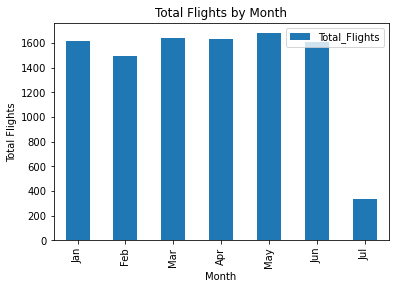

In [41]:
ax = flights_by_month.plot(kind='bar', x='Month', y='Total_Flights')
#plt.xticks(range(0,12))
plt.title("Total Flights by Month")
plt.ylabel("Total Flights")
plt.show();

Most flights occur in the months of Mar and May. the least flights are in the month Jul.

In [45]:
# Total Flights by  Day of Week 
flights_by_Day_of_Week = df.DayOfWeek.value_counts().reset_index()
flights_by_Day_of_Week.columns = ["Day_of_Week", "Total_Flights"]
flights_by_Day_of_Week=Sort_Dataframeby_Weekday(df=flights_by_Day_of_Week,Weekdaycolumnname='Day_of_Week')
flights_by_Day_of_Week


,Day_of_Week,Total_Flights
0,Monday,1483
1,Tuesday,1465
2,Wednesday,1480
3,Thursday,1493
4,Friday,1440
5,Saturday,1233
6,Sunday,1406


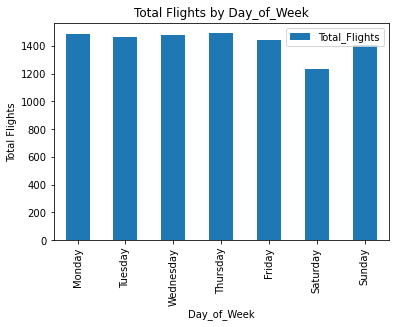

In [46]:
ax = flights_by_Day_of_Week.plot(kind='bar', x='Day_of_Week', y='Total_Flights')
plt.title("Total Flights by Day_of_Week")
plt.ylabel("Total Flights")
plt.show();

Most flights occur on Thursday. Saturday have the least number of flights

In [29]:
# Total Flights by  Day of Year 
flights_by_Day_of_Week = df.Date.value_counts().reset_index()
flights_by_Day_of_Week.columns = ["Date", "Total_Flights"]
flights_by_Day_of_Week

,Date,Total_Flights
0,2008-01-21,73
1,2008-05-15,72
2,2008-04-23,69
3,2008-01-29,68
4,2008-05-28,67
...,...,...
208,2008-07-10,6
209,2008-07-11,5
210,2008-07-19,5
211,2008-07-02,3


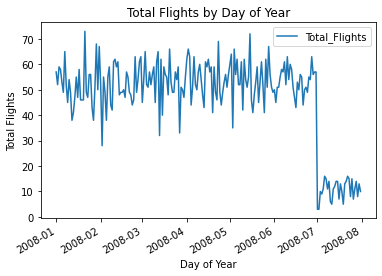

In [33]:
# polt 
ax=flights_by_Day_of_Week.plot(kind='line', x='Date', y='Total_Flights')
plt.title("Total Flights by Day of Year")
plt.ylabel("Total Flights")
plt.xlabel("Day of Year")
plt.show();

Flight frequency fluctuates on a day by day basis. However, flights appear to be least frequent in the summer .


In [15]:
# Percentage of Flights that are Cancelled 
df_cancelled = df['Cancelled'].value_counts().reset_index()
cancelled_percent = df_cancelled.Cancelled[1] / (df_cancelled.Cancelled[0] + df_cancelled.Cancelled[1]) * 100
not_cancelled_percent= 100-cancelled_percent
cancelled_percent =str(round(cancelled_percent, 2)) + "%"
not_cancelled_percent=str(round(not_cancelled_percent, 2)) + "%"
not_cancelled_percent

'97.69%'

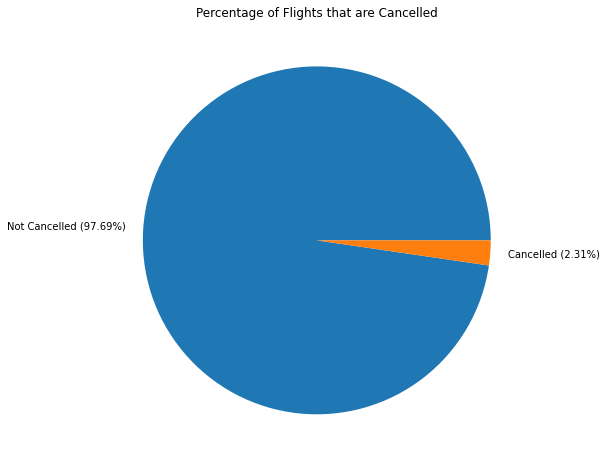

In [16]:
# Plot
df_cancelled.Cancelled.plot(kind= 'pie', labels = ['Not Cancelled (' + not_cancelled_percent + ')', 'Cancelled (' + cancelled_percent + ')'], figsize=(8,8))
plt.title("Percentage of Flights that are Cancelled")
plt.ylabel("");

2.31% of all flights are cancelled. That is almost two flights per one hundred.

In [17]:
# Causes of Flight Cancellations 
df['CancellationCode'].value_counts()

carrier    101
weather     90
NAS         40
Name: CancellationCode, dtype: int64

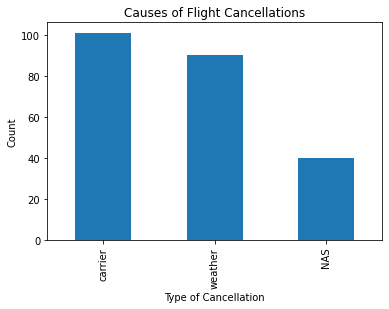

In [18]:
# plot
df['CancellationCode'].value_counts().plot(kind= 'bar')
plt.title("Causes of Flight Cancellations")
plt.ylabel("Count")
plt.xlabel("Type of Cancellation")
plt.show();

The most common cause of flight cancellations is carrier.

In [19]:
# Time periods of Carrier Delays
bin_edges = [1, 9, 19, 41, 2436]
bin_names = ['1-8', '9-18', '19-39', '40-1951']
periods = pd.cut(df['CarrierDelay'], bin_edges, labels=bin_names)

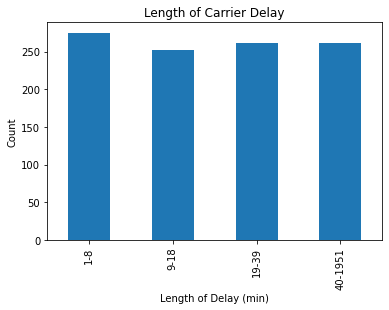

In [20]:
# Polt
periods.value_counts(sort = False).plot(kind= 'bar')
plt.title("Length of Carrier Delay")
plt.ylabel("Count")
plt.xlabel("Length of Delay (min)")
plt.show();

Carrier delays are most commonly 1-8 minutes long

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 >#### Total Flights by Day of Year
 Due to working with such a large data set, I initially used a sample of the data set (10,000 entries) to visualize my data. Doing this, I was unable to see an obvious pattern in the visualization of total flights by day of year. However, when I used the full data set, I was able to group the data into four sections of the year where the number of flights were similar. Using the full data set paints a clearer picture as to how flights are distributed throughout the year.


# Bivariate Exploration

In [48]:
# Average cancellation for every Month
df_cancelled_month = df.groupby(['Month'])['Cancelled'].mean().reset_index().sort_values(['Cancelled'], ascending = False)
df_cancelled_month=Sort_Dataframeby_Month(df=df_cancelled_month,monthcolumnname='Month')

df_cancelled_month

,Month,Cancelled
0,Jan,0.027864
1,Feb,0.047428
2,Mar,0.026268
3,Apr,0.015309
4,May,0.010125
5,Jun,0.017435
6,Jul,0.006006


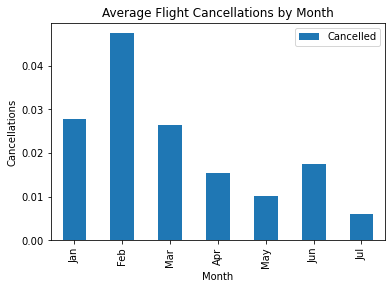

In [49]:
# plot 
df_cancelled_month.plot(kind='bar', x='Month', y='Cancelled')
plt.title("Average Flight Cancellations by Month")
plt.ylabel("Cancellations")
plt.xlabel("Month")
plt.show();

Flights are most commonly cancelled in Feb. Flights are least commonly cancelled in Jul.


In [50]:
# Average weather delay by month in minutes
df_weather_delay_month = df.groupby(['Month'])['WeatherDelay'].mean().reset_index().sort_values(['WeatherDelay'], ascending = False)
df_weather_delay_month=Sort_Dataframeby_Month(df=df_weather_delay_month,monthcolumnname='Month')
df_weather_delay_month

,Month,WeatherDelay
0,Jan,3.270510
1,Feb,2.128866
2,Mar,3.594533
3,Apr,1.733333
4,May,2.011561
5,Jun,3.272093
6,Jul,1.353846


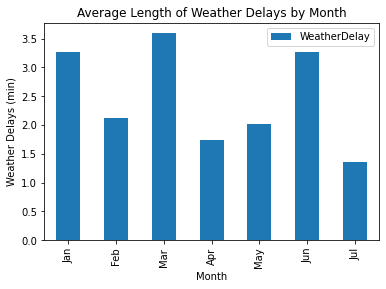

In [51]:
# plot 
df_weather_delay_month.plot(kind='bar', x='Month', y='WeatherDelay')
plt.title("Average Length of Weather Delays by Month")
plt.ylabel("Weather Delays (min)")
plt.xlabel("Month")
plt.show();

Flights experience weather delays most commonly in Mar. Flights are least commonly delayed by weather in Jul.

In [53]:
# average cancellations by day of week in minutes
df_cancelled_weekday = df.groupby(['DayOfWeek'])['Cancelled'].mean().reset_index().sort_values(['Cancelled'], ascending = False)
df_cancelled_weekday=Sort_Dataframeby_Weekday(df=df_cancelled_weekday,Weekdaycolumnname='DayOfWeek')
df_cancelled_weekday

,DayOfWeek,Cancelled
0,Monday,0.019555
1,Tuesday,0.024573
2,Wednesday,0.029730
3,Thursday,0.020764
4,Friday,0.027083
5,Saturday,0.019465
6,Sunday,0.019915


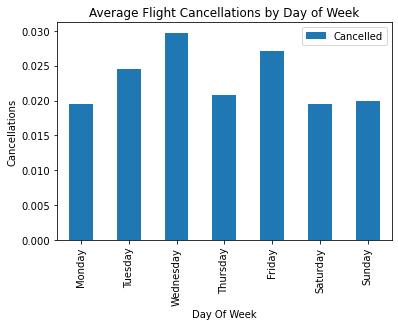

In [54]:
# plot 
df_cancelled_weekday.plot(kind='bar', x='DayOfWeek', y='Cancelled')
plt.title("Average Flight Cancellations by Day of Week")
plt.ylabel("Cancellations")
plt.xlabel("Day Of Week")
plt.show();

Flights are most commonly cancelled on Wednesday. Flights are least commonly cancelled on Saturdays.

In [55]:
# Average NAS Delay by Day of Week
df_NAS_Delay_weekday = df.groupby(['DayOfWeek'])['NASDelay'].mean().reset_index().sort_values(['NASDelay'], ascending = False)
df_NAS_Delay_weekday=Sort_Dataframeby_Weekday(df=df_NAS_Delay_weekday,Weekdaycolumnname='DayOfWeek')
df_NAS_Delay_weekday

,DayOfWeek,NASDelay
0,Monday,15.348774
1,Tuesday,22.014124
2,Wednesday,12.006410
3,Thursday,18.134454
4,Friday,17.370647
5,Saturday,13.664474
6,Sunday,15.575071


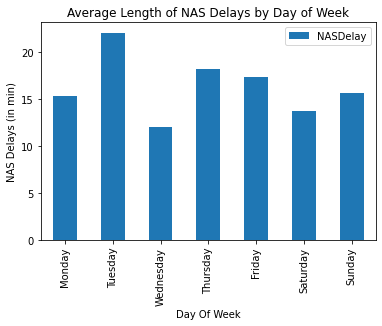

In [57]:
# plot 
df_NAS_Delay_weekday.plot(kind='bar', x='DayOfWeek', y='NASDelay')
plt.title("Average Length of NAS Delays by Day of Week")
plt.ylabel("NAS Delays (in min)")
plt.xlabel("Day Of Week")
plt.show();

Flights experience NAS delays most commonly on Tuesday. Flights are least commonly delayed by carrier on Wednesday

In [58]:
# average late aircraft carrier delays by day of week
df_ld_weekday = df.groupby(['DayOfWeek'])['LateAircraftDelay'].mean().reset_index().sort_values(['LateAircraftDelay'], ascending = False)
df_ld_weekday=Sort_Dataframeby_Weekday(df=df_ld_weekday,Weekdaycolumnname='DayOfWeek')
df_ld_weekday

,DayOfWeek,LateAircraftDelay
0,Monday,20.098093
1,Tuesday,21.152542
2,Wednesday,16.612179
3,Thursday,17.501401
4,Friday,21.291045
5,Saturday,19.217105
6,Sunday,22.481586


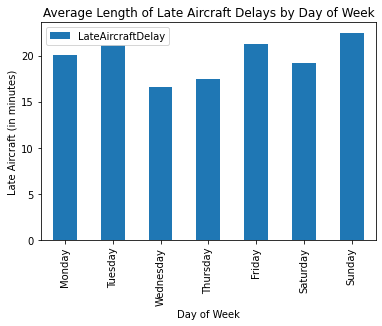

In [59]:
# plot
df_ld_weekday.plot(kind='bar', x='DayOfWeek', y='LateAircraftDelay')
plt.title("Average Length of Late Aircraft Delays by Day of Week")
plt.ylabel("Late Aircraft (in minutes)")
plt.xlabel("Day of Week")
plt.show();

Flights experience late aircraft delays most commonly on Sunday. Flights are least commonly delayed by late aircraft carriers on Wednesday.

# Multivariate Exploration

In [60]:
# average cancellations by month and cancellations code
df_cancelled_mv1 = df.groupby(['Month', 'CancellationCode'])['Cancelled'].count().reset_index()
df_cancelled_mv1=Sort_Dataframeby_Month(df=df_cancelled_mv1,monthcolumnname='Month')
df_cancelled_mv1

,Month,CancellationCode,Cancelled
0,Jan,NAS,16
1,Jan,carrier,12
2,Jan,weather,17
3,Feb,NAS,13
4,Feb,carrier,26
5,Feb,weather,32
6,Mar,NAS,2
7,Mar,carrier,19
8,Mar,weather,22
9,Apr,NAS,3


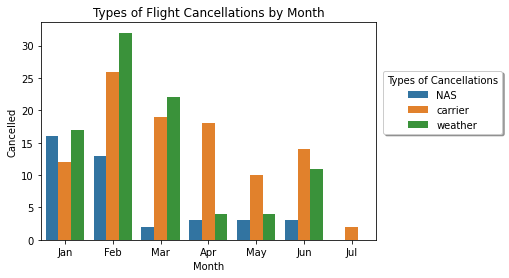

In [61]:
# plot
ax = sns.barplot(data = df_cancelled_mv1, x = 'Month', y = 'Cancelled', hue = 'CancellationCode')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1, title = 'Types of Cancellations')
ax.set_title('Types of Flight Cancellations by Month');

Carrier is the most common monthly cause for flight cancellations, followed by weather. NAS cancellations are the least common cause for cancellations for all months.



In [63]:
#Length of Delays by Month
df_delay_carrier = df.groupby(['Month'])['CarrierDelay'].mean().reset_index()
df_delay_weather = df.groupby(['Month'])['WeatherDelay'].mean().reset_index()
df_delay_NAS = df.groupby(['Month'])['NASDelay'].mean().reset_index()
df_delay_LateAircraft = df.groupby(['Month'])['LateAircraftDelay'].mean().reset_index()


In [64]:
# Jons data  
df_delay = pd.merge(df_delay_carrier, df_delay_weather, on='Month', how='outer')
df_delay = pd.merge(df_delay, df_delay_NAS, on='Month', how='outer')
df_delay = pd.merge(df_delay, df_delay_LateAircraft, on='Month', how='outer')
df_delay =Sort_Dataframeby_Month(df=df_delay,monthcolumnname='Month')
df_delay 

,Month,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
0,Jan,13.929047,3.270510,19.319290,18.773836
1,Feb,18.597938,2.128866,14.270619,21.615979
2,Mar,16.756264,3.594533,15.277904,19.954442
3,Apr,17.866667,1.733333,15.757576,18.384848
4,May,14.141618,2.011561,16.566474,16.893064
5,Jun,15.355814,3.272093,17.974419,21.751163
6,Jul,14.692308,1.353846,10.200000,26.969231


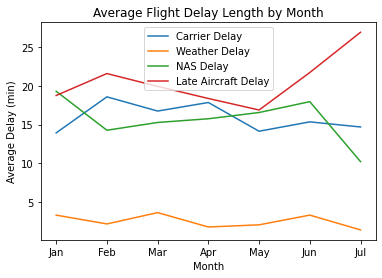

In [65]:
# plot 
ax = df_delay.plot(x="Month", y=["CarrierDelay", "WeatherDelay", "NASDelay", "LateAircraftDelay"], kind="line", title='Average Flight Delay Length by Month')
#plt.xticks(range(0,12),df_delay["Month"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Late Aircraft Delay')
ax.set_ylabel('Average Delay (min)');

NAS and late Aircraft delays have the longest average duration of delay of total monthly flights amd Weather has the shortest duration of delay of total monthly flights.

In [67]:
# Types of Cancellations by Day of Week
# count cancellations by day of week and cancellation code
df_cancelled_mv = df.groupby(['DayOfWeek', 'CancellationCode'])['Cancelled'].count().reset_index()
df_cancelled_mv=Sort_Dataframeby_Weekday(df=df_cancelled_mv,Weekdaycolumnname='DayOfWeek')
df_cancelled_mv

,DayOfWeek,CancellationCode,Cancelled
0,Monday,NAS,10
1,Monday,carrier,12
2,Monday,weather,7
3,Tuesday,NAS,6
4,Tuesday,carrier,16
5,Tuesday,weather,14
6,Wednesday,NAS,2
7,Wednesday,carrier,23
8,Wednesday,weather,19
9,Thursday,NAS,5


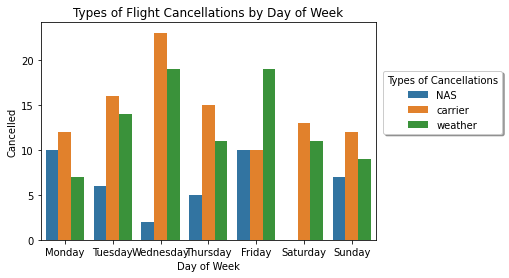

In [68]:
# plot

ax = sns.barplot(data = df_cancelled_mv, x = 'DayOfWeek', y = 'Cancelled', hue = 'CancellationCode')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1, title = 'Types of Cancellations')
ax.set_title('Types of Flight Cancellations by Day of Week')
ax.set_xlabel('Day of Week');

carrier is the most common weekly cause for flight cancellations, followed by Weather. NAS cancellations are the least common cause for cancellations for all days of the week.

In [69]:
#Length of Delays by Day of Week
df_delay_carrier = df.groupby(['DayOfWeek'])['CarrierDelay'].mean().reset_index()
df_delay_weather = df.groupby(['DayOfWeek'])['WeatherDelay'].mean().reset_index()
df_delay_NAS = df.groupby(['DayOfWeek'])['NASDelay'].mean().reset_index()
df_delay_LateAircraft = df.groupby(['DayOfWeek'])['LateAircraftDelay'].mean().reset_index()

In [70]:
# Join data
df_delay = pd.merge(df_delay_carrier, df_delay_weather, on='DayOfWeek', how='outer')
df_delay = pd.merge(df_delay, df_delay_NAS, on='DayOfWeek', how='outer')
df_delay = pd.merge(df_delay, df_delay_LateAircraft, on='DayOfWeek', how='outer')
df_delay=Sort_Dataframeby_Weekday(df=df_delay,Weekdaycolumnname='DayOfWeek')
df_delay 

,DayOfWeek,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
0,Monday,14.653951,2.128065,15.348774,20.098093
1,Tuesday,13.771186,2.155367,22.014124,21.152542
2,Wednesday,18.506410,1.532051,12.006410,16.612179
3,Thursday,18.490196,2.845938,18.134454,17.501401
4,Friday,16.910448,3.315920,17.370647,21.291045
5,Saturday,19.000000,4.398026,13.664474,19.217105
6,Sunday,11.328612,2.645892,15.575071,22.481586


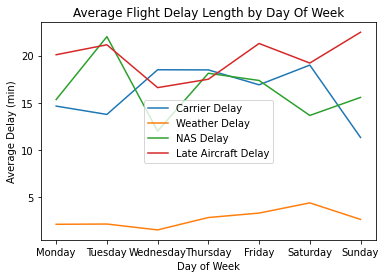

In [71]:
# plot
ax = df_delay.plot(x="DayOfWeek", y=["CarrierDelay", "WeatherDelay", "NASDelay", "LateAircraftDelay"], kind="line", title='Average Flight Delay Length by Day Of Week')
plt.xticks(range(0,7),df_delay["DayOfWeek"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Late Aircraft Delay')
ax.set_ylabel('Average Delay (min)')
ax.set_xlabel('Day of Week');

NAS and late carrier delays had the longest average delay length. Weather delays had the shortest average delay length for all days of the week

In [72]:
# Percentage of Flights Delayed by Day of Week
df_delayw = df_delay.copy()
df_delayw = df_delayw[["CarrierDelay", "WeatherDelay", "NASDelay", "LateAircraftDelay"]].div(flights_by_Day_of_Week.Total_Flights, axis=0)
df_delayw.insert(0, "DayOfWeek", df_delay["DayOfWeek"], True)
df_delayw

,DayOfWeek,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
0,Monday,0.009881,0.001435,0.010350,0.013552
1,Tuesday,0.009400,0.001471,0.015027,0.014439
2,Wednesday,0.012504,0.001035,0.008112,0.011224
3,Thursday,0.012385,0.001906,0.012146,0.011722
4,Friday,0.011743,0.002303,0.012063,0.014785
5,Saturday,0.015410,0.003567,0.011082,0.015586
6,Sunday,0.008057,0.001882,0.011078,0.015990


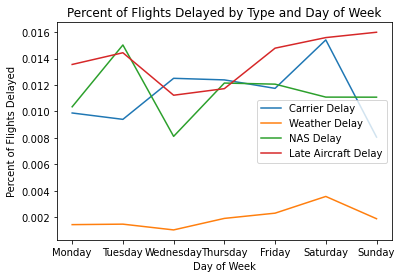

In [73]:
# plot
ax = df_delayw.plot(x="DayOfWeek", y=["CarrierDelay", "WeatherDelay", "NASDelay", "LateAircraftDelay"], kind="line", title='Percent of Flights Delayed by Type and Day of Week')
#plt.xticks(range(0,7),df_delayw["DayOfWeek"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Late Aircraft Delay')
ax.set_ylabel('Percent of Flights Delayed')
ax.set_xlabel('Day of Week');

Results were similar to that of types of delays by week where NAS and late Aircraft delays have the highest percentage of delays of total weekly flights and Weather has the least percentage of delays of total weekly flights.

### Were there any interesting or surprising interactions between features?
  Security delays and cancellations are very infrequent compared with the other types of delays and cancellations.

In [10]:
df.to_csv('sampled_10000.csv',index=False)